# OPENING A DISTRIBUTION CENTER FOR RESTAURANTS IN BARCELONA

This Capstone Project consists in scraping a Wikipedia Page to get the necessary information, using Google API to get Longitudes and Latitudes of the different Neighborhoods in Barcelona, using Foursquare API to get the nearby venues of each of the neighborhoods, using K-means clustering to the neighboods, analizing each cluster in order to identify the one that has as most common venue Hotels, Bars and restaurants meaning that tourist frequent the area. Identifying the best Neighborhood from this cluster and finally finding the centroid among the venues to use as the location for the Distribution Center.

#   BUSINESS PROBLEM

Barcelona, located in north-eastern Spain and on the shores of the Mediterranean, is one of the principal European cities.

Given it's location, Barcelona is rich in food and cuisine culture, with the Mediterranean Diet as a key driver.
Barcelona offers a number of different elements that make it an attractive place to do business. Today the city is a highly interesting location for new economic activities.

For that reason we are evaluating which could be the perfect location to open a Distribution Center for Restaurants.




# DATA

The data that will be used in this project was found in:

https://es.wikipedia.org/wiki/Distritos_de_Barcelona

Google API Geocode

Foursquare API

Sklearn Kmeans Clustering

Import the necessary Libraries

In [41]:
!pip install wikitables
from wikitables import import_tables
import numpy as np; # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage;
from sklearn.cluster import KMeans
#Import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
!pip install wikipedia
import wikipedia as wp

print('Libraries imported.')

Requirement not upgraded as not directly required: wikitables in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: requests>=2.9.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wikitables)
Requirement not upgraded as not directly required: mwparserfromhell>=0.4.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wikitables)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda

Obtaing the HTML of the wikipedia page using BeautifulSoup

In [42]:
from bs4 import BeautifulSoup
website_url = requests.get('https://es.wikipedia.org/wiki/Distritos_de_Barcelona').text
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Distritos de Barcelona - Wikipedia, la enciclopedia libre
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Distritos_de_Barcelona","wgTitle":"Distritos de Barcelona","wgCurRevisionId":105383948,"wgRevisionId":105383948,"wgArticleId":281671,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Distritos de Barcelona"],"wgBreakFrames":false,"wgPageContentLanguage":"es","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","m

Find the table in the Wikipedia Page and extract the necessary data. From this table we need the name of the 'Barrios' (Neighborhoods) from Barcelona

Screen Shot 2018-08-13 at 12.26.44 AM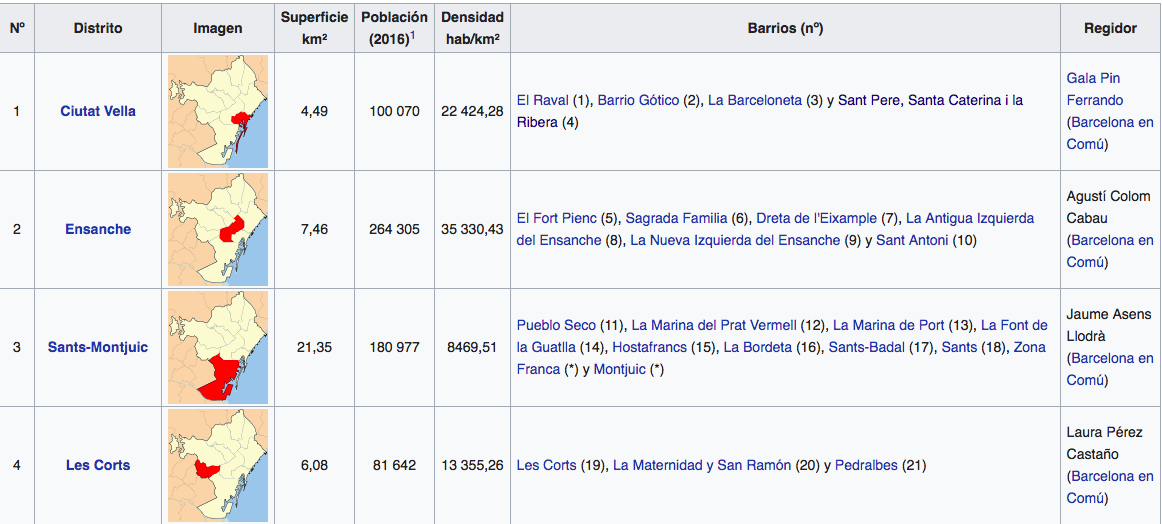

In [131]:
My_table = soup.find('table')
links = My_table.findAll('a')
Texts = []
for link in links:
    Texts.append(link.get('title'))
Districts = []
Districts.append(Texts[3:7])
Districts.append(Texts[11:17])
Districts.append(Texts[20:28])
Districts.append(Texts[33:36])
Districts.append(Texts[39:45])
Districts.append(Texts[49:54])
Districts.append(Texts[57:68])
Districts.append(Texts[71:84])
Districts.append(Texts[87:94])
Districts.append(Texts[98:108])
df=pd.DataFrame(Texts[3:7])
df2=pd.DataFrame(Texts[11:17])
df3=pd.DataFrame(Texts[20:28])
df4=pd.DataFrame(Texts[33:36])
df5=pd.DataFrame(Texts[39:45])
df6=pd.DataFrame(Texts[49:54])
df7=pd.DataFrame(Texts[57:68])
df8=pd.DataFrame(Texts[71:84])
df9=pd.DataFrame(Texts[87:94])
df10=pd.DataFrame(Texts[98:108])
frames=[df,df2,df3,df4,df5,df6,df7,df8,df9,df10]
result=pd.concat(frames,ignore_index=True)

For using the Google API you'll need a API Key which for this this project will remain hidden

In [8]:
# The code was removed by Watson Studio for sharing.

In [132]:
result

,0
0,El Raval
1,Barrio Gótico de Barcelona
2,La Barceloneta
3,"Sant Pere, Santa Caterina i la Ribera"
4,Fort Pienc
5,Barrio de la Sagrada Familia (Barcelona)
6,Dreta de l'Eixample
7,La Antigua Izquierda del Ensanche
8,La Nueva Izquierda del Ensanche
9,Barrio de Sant Antoni (Barcelona)


Using a for loop and geocode we obtain the coordinates of the remaining Neighborhoods

In [134]:
Barcelona=result
Latitude=[]
Longitude=[]
City=', Barcelona '
for x in range(0,73):
    neigh=Barcelona.loc[x][0]
    Location=neigh+ City
    url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(API_key, Location)
    response = requests.get(url).json()
    #print(response)
    geographical_data = response['results'][0]['geometry']['location']
    Latitude.append(geographical_data['lat'])
    Longitude.append(geographical_data['lng'])
Barcelona['Latitude']=Latitude
Barcelona['Longitude']=Longitude
Barcelona.rename(columns={0: "Neighborhood"}, inplace=True)
Barcelona

,Neighborhood,Latitude,Longitude
0,El Raval,41.379716,2.168184
1,Barrio Gótico de Barcelona,41.381906,2.178185
2,La Barceloneta,41.380894,2.189385
3,"Sant Pere, Santa Caterina i la Ribera",41.386820,2.183100
4,Fort Pienc,41.398110,2.181871
5,Barrio de la Sagrada Familia (Barcelona),41.404484,2.175728
6,Dreta de l'Eixample,41.396310,2.165383
7,La Antigua Izquierda del Ensanche,41.388557,2.157303
8,La Nueva Izquierda del Ensanche,41.383733,2.147480
9,Barrio de Sant Antoni (Barcelona),41.377266,2.158531


We now visualize using Folium the neighborhoods in Barcelona

In [135]:
address = 'Barcelona'
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitudes = location.latitude
longitudes = location.longitude
# create map of Barcelona using latitude and longitude values
map_Barcelona = folium.Map(location=[latitudes, longitudes], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Barcelona['Latitude'], Barcelona['Longitude'], Barcelona['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Barcelona)  
    
map_Barcelona

In [136]:
import io
import requests
url="http://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/1d9ff171-6f23-45c1-b02f-203b0589f08a/download/2016_distribucio_territorial_renda_familiar.csv"
s=requests.get(url).content
rfd_index=pd.read_csv(io.StringIO(s.decode('utf-8')))
rfd_index

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2016,1,Ciutat Vella,1,el Raval,47274,74.6
1,2016,1,Ciutat Vella,2,el Barri Gòtic,15729,110.5
2,2016,1,Ciutat Vella,3,la Barceloneta,15068,84.8
3,2016,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22380,97.8
4,2016,2,Eixample,5,el Fort Pienc,31693,105.0
5,2016,2,Eixample,6,la Sagrada Família,51349,95.9
6,2016,2,Eixample,7,la Dreta de l'Eixample,43715,170.0
7,2016,2,Eixample,8,l'Antiga Esquerra de l'Eixample,41872,139.2
8,2016,2,Eixample,9,la Nova Esquerra de l'Eixample,57676,105.3
9,2016,2,Eixample,10,Sant Antoni,38182,104.0


In [139]:
Barcelona['Population']=rfd_index['Població']
Barcelona['RFD Index']=rfd_index['Índex RFD Barcelona = 100']
Barcelona=Barcelona.reset_index(drop=True)
Barcelona.sort_values('Neighborhood',ascending=True,inplace=True)
Barcelona=Barcelona.reset_index(drop=True)
Barcelona

,Neighborhood,Latitude,Longitude,Population,RFD Index
0,Baix Guinardó,41.412131,2.168357,25563,92.0
1,Barrio Gótico de Barcelona,41.381906,2.178185,15729,110.5
2,Barrio de Les Corts,41.389013,2.132749,45976,119.9
3,Barrio de Sant Antoni (Barcelona),41.377266,2.158531,38182,104.0
4,Barrio de la Sagrada Familia (Barcelona),41.404484,2.175728,51349,95.9
5,Baró de Viver,41.444099,2.197847,2511,72.6
6,Camp d'en Grassot i Gràcia Nova,41.404668,2.165900,34275,108.1
7,Can Baró,41.417228,2.163444,8969,96.0
8,Can Peguera,41.434379,2.166208,2216,51.5
9,Canyelles (barrio),41.444749,2.163444,6925,54.4


For using the Foursquare API, we need a client ID and a client secret, in this project this information will be hidden

In [140]:
# The code was removed by Watson Studio for sharing.

Using the function used in the previous lab, we will be able to obtain the nearby venues of the neighborhoods

In [141]:
def getNearbyVenues(names, latitudes, longitudes, radius=850):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [142]:
LIMIT = 100
radius = 850
Barcelona_venues = getNearbyVenues(names=Barcelona['Neighborhood'],
                                   latitudes=Barcelona['Latitude'],
                                   longitudes=Barcelona['Longitude']
                                  )

Baix Guinardó
Barrio Gótico de Barcelona
Barrio de Les Corts
Barrio de Sant Antoni (Barcelona)
Barrio de la Sagrada Familia (Barcelona)
Baró de Viver
Camp d'en Grassot i Gràcia Nova
Can Baró
Can Peguera
Canyelles (barrio)
Ciudad Meridiana
Congrés i els Indians
Diagonal Mar i Front Marítim del Poblenou
Dreta de l'Eixample
El Besós y el Maresme
El Buen Pastor (Barcelona)
El Campo del Arpa del Clot
El Carmelo
El Clot
El Coll
El Guinardó
El Parc i la Llacuna del Poblenou
El Raval
El Valle de Hebrón
Fort Pienc
Horta (Barcelona)
Hostafrancs
La Antigua Izquierda del Ensanche
La Barceloneta
La Bordeta
La Clota
La Font d'en Fargues
La Font de la Guatlla
La Guineueta
La Marina de Port
La Marina del Prat Vermell
La Maternidad y San Ramón
La Nueva Izquierda del Ensanche
La Prosperitat
La Sagrera
La Salud (Barcelona)
La Teixonera
La Trinitat Nova
La Trinitat Vella
La Verneda y la Paz
La Vila Olímpica del Poblenou
Las Tres Torres
Les Roquetes
Montbau
Navas (barrio)
Pedralbes
Porta (Barcelona)
Proven

In [143]:
print(Barcelona_venues.shape)

(5490, 7)


In [144]:
Barcelona_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Baix Guinardó,41.412131,2.168357,Basilicata,41.410857,2.166199,Latin American Restaurant
1,Baix Guinardó,41.412131,2.168357,Xiringuito Aigua,41.409806,2.168379,Beer Garden
2,Baix Guinardó,41.412131,2.168357,DiR Castillejos,41.412432,2.170713,Gym
3,Baix Guinardó,41.412131,2.168357,Phenomena,41.408993,2.171712,Indie Movie Theater
4,Baix Guinardó,41.412131,2.168357,Belle e Buòn,41.411296,2.173380,Italian Restaurant


Since we are going to cluster the Neighborhoods according to the Venue Category and this is a Categorical variable, we'll need to use one hot encoder, to make dummy variables.

In [145]:
# one hot encoding
Barcelona_onehot = pd.get_dummies(Barcelona_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
Barcelona_onehot['Neighborhood'] = Barcelona_venues['Neighborhood'] 


Barcelona_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,V

In [146]:
# move neighborhood column to the first column
colnames = Barcelona_onehot.columns.tolist()
print(colnames.index('Neighborhood'))
fixed_columns = [Barcelona_onehot.columns[181]] + list(Barcelona_onehot.columns[:181])
Barcelona_onehot = Barcelona_onehot[fixed_columns]
Barcelona_onehot.head()

181


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

We then groupby the data to get the frequency of each venue category in every neighborhood

In [147]:
Barcelona_grouped = Barcelona_onehot.groupby('Neighborhood').mean().reset_index()
Barcelona_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,Baix Guinardó,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.070000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.020000,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.020000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.050000,0.030000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.00,0.020000,0.00,0.010000,0.00,0.00,0.00,0.030000,0.050000,0.00,0.000000,0.00,0.00,0.00,0.020000,0.010000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000
1,B

In [148]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now we can now which are the most common venues in every neighborhood

In [149]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Barcelona_grouped['Neighborhood']

for ind in np.arange(Barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,Bar,Grocery Store,Japanese Restaurant,Bakery,Café,Mediterranean Restaurant,Gym,Hotel,Italian Restaurant,Breakfast Spot
1,Barrio Gótico de Barcelona,Italian Restaurant,Hotel,Bar,Cocktail Bar,Coffee Shop,Ice Cream Shop,Dessert Shop,Candy Store,Mediterranean Restaurant,Falafel Restaurant
2,Barrio de Les Corts,Café,Hotel,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Burger Joint,Mediterranean Restaurant,Bakery
3,Barrio de Sant Antoni (Barcelona),Café,Mediterranean Restaurant,Bar,Cocktail Bar,Hotel,Coffee Shop,Argentinian Restaurant,Japanese Restaurant,Mexican Restaurant,Breakfast Spot
4,Barrio de la Sagrada Familia (Barcelona),Italian Restaurant,Historic Site,Café,Burger Joint,Gym,Hotel,Bar,Bakery,Asian Restaurant,Coffee Shop
5,Baró de Viver,Clothing Store,Electronics Store,Burger Joint,Fast Food Restaurant,Cosmetics Shop,Coffee Shop,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Grocery Store
6,Camp d'en Grassot i Gràcia Nova,Mediterranean Restaurant,Bar,Hostel,Farmers Market,Café,Brewery,Indie Movie Theater,Japanese Restaurant,Cocktail Bar,Gym
7,Can Baró,Gym,Grocery Store,Café,Bar,Bakery,Dessert Shop,Latin American Restaurant,Historic Site,Coffee Shop,Italian Restaurant
8,Can Peguera,Grocery Store,Café,Food & Drink Shop,Bar,Burger Joint,Bakery,Breakfast Spot,Hot Dog Joint,Italian Restaurant,Metro Station
9,Canyelles (barrio),Café,Bar,Market,Food,Food & Drink Shop,Food Court,Mediterranean Restaurant,Grocery Store,Music Venue,Climbing Gym


In [150]:
Barcelona_grouped_clustering = Barcelona_grouped.drop('Neighborhood', 1)
Barcelona_grouped_clustering['Population']=Barcelona['Population']
Barcelona_grouped_clustering['RFD Index']=Barcelona['RFD Index']
Barcelona_grouped_clustering

,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Population,RFD Index
0,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.070000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.020000,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.020000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.050000,0.030000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.00,0.020000,0.00,0.010000,0.00,0.00,0.00,0.030000,0.050000,0.00,0.000000,0.00,0.00,0.00,0.020000,0.010000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,25563,92.

In [151]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(Barcelona_grouped_clustering)
X
X_kmeans=X
X_kmeans


array([[-0.16783627, -0.11785113, -0.15875045, ..., -0.2870492 ,
         0.2424826 , -0.02448325],
       [-0.16783627, -0.11785113, -0.15875045, ..., -0.2870492 ,
        -0.43836589,  0.42233614],
       [-0.16783627, -0.11785113, -0.15875045, ..., -0.2870492 ,
         1.65575901,  0.6493687 ],
       ..., 
       [-0.16783627, -0.11785113, -0.15875045, ...,  0.86897495,
        -0.67846987, -0.94710493],
       [-0.16783627, -0.11785113, -0.15875045, ..., -0.2870492 ,
         0.239644  , -0.70799617],
       [-0.16783627, -0.11785113, -0.15875045, ...,  0.33720384,
         1.98074404,  0.20496454]])

In [155]:
# set number of clusters

kclusters = 5

Barcelona_grouped_clustering = Barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters).fit(Barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_



array([1, 0, 4, 0, 4, 1, 0, 1, 1, 1, 3, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 0,
       1, 4, 1, 4, 4, 0, 1, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1, 0, 1, 1, 3, 1, 4,
       4, 1, 1, 1, 4, 1, 4, 4, 0, 4, 1, 1, 4, 4, 4, 0, 0, 4, 4, 1, 1, 3, 4,
       2, 1, 1, 0], dtype=int32)

In [156]:
Barcelona_merged = Barcelona
# add clustering labels
Barcelona_merged['Cluster Labels'] = kmeans.labels_
#merge Barcelona_grouped with Barcelona_data to add latitude/longitude for each neighborhood
#Barcelona_merged = Barcelona_merged.join(neighborhoods_venues_sorted)
Barcelona_merged.sort_values('Neighborhood',ascending=True,inplace=True)
Barcelona_merged=Barcelona_merged.reset_index(drop=True)
Barcelona_merged = Barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Barcelona_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,41.412131,2.168357,25563,92.0,1,Bar,Grocery Store,Japanese Restaurant,Bakery,Café,Mediterranean Restaurant,Gym,Hotel,Italian Restaurant,Breakfast Spot
1,Barrio Gótico de Barcelona,41.381906,2.178185,15729,110.5,0,Italian Restaurant,Hotel,Bar,Cocktail Bar,Coffee Shop,Ice Cream Shop,Dessert Shop,Candy Store,Mediterranean Restaurant,Falafel Restaurant
2,Barrio de Les Corts,41.389013,2.132749,45976,119.9,4,Café,Hotel,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Burger Joint,Mediterranean Restaurant,Bakery
3,Barrio de Sant Antoni (Barcelona),41.377266,2.158531,38182,104.0,0,Café,Mediterranean Restaurant,Bar,Cocktail Bar,Hotel,Coffee Shop,Argentinian Restaurant,Japanese Restaurant,Mexican Restaurant,Breakfast Spot
4,Barrio de la Sagrada Familia (Barcelona),41.404484,2.175728,51349,95.9,4,Italian Restaurant,Historic Site,Café,Burger Joint,Gym,Hotel,Bar,Bakery,Asian Restaurant,Coffee Shop


Visualize using Folium the clusters

In [157]:
# create map
map_Kmeans_clusters = folium.Map(location=[latitudes, longitudes], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Barcelona_merged['Latitude'], Barcelona_merged['Longitude'], Barcelona_merged['Neighborhood'], Barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Kmeans_clusters)
       
map_Kmeans_clusters

We now analize each cluster


In [186]:
Cluster_0_tot=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 0, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_1_tot=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 1, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_2_tot=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 2, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_3_tot=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 3, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_4_tot=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 4, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_0=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 0, Barcelona_merged.columns[[0] + list(range(3, Barcelona_merged.shape[1]))]]
Cluster_1=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 1, Barcelona_merged.columns[[0] + list(range(3, Barcelona_merged.shape[1]))]]
Cluster_2=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 2, Barcelona_merged.columns[[0] + list(range(3, Barcelona_merged.shape[1]))]]
Cluster_3=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 3, Barcelona_merged.columns[[0] + list(range(3, Barcelona_merged.shape[1]))]]
Cluster_4=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 4, Barcelona_merged.columns[[0] + list(range(, Barcelona_merged.shape[1]))]]


In [187]:
Cluster_0

,Neighborhood,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barrio Gótico de Barcelona,15729,110.5,0,Italian Restaurant,Hotel,Bar,Cocktail Bar,Coffee Shop,Ice Cream Shop,Dessert Shop,Candy Store,Mediterranean Restaurant,Falafel Restaurant
3,Barrio de Sant Antoni (Barcelona),38182,104.0,0,Café,Mediterranean Restaurant,Bar,Cocktail Bar,Hotel,Coffee Shop,Argentinian Restaurant,Japanese Restaurant,Mexican Restaurant,Breakfast Spot
6,Camp d'en Grassot i Gràcia Nova,34275,108.1,0,Mediterranean Restaurant,Bar,Hostel,Farmers Market,Café,Brewery,Indie Movie Theater,Japanese Restaurant,Cocktail Bar,Gym
22,El Raval,47274,74.6,0,Cocktail Bar,Bar,Mediterranean Restaurant,Hotel,Bookstore,Japanese Restaurant,Beer Bar,Coffee Shop,Indian Restaurant,Mexican Restaurant
28,La Barceloneta,15068,84.8,0,Mediterranean Restaurant,Ice Cream Shop,Burger Joint,Bar,Cocktail Bar,Breakfast Spot,Beach,Beer Bar,Coffee Shop,Mexican Restaurant
40,La Salud (Barcelona),13123,116.4,0,Bar,Hotel,Mediterranean Restaurant,Café,Grocery Store,Art Gallery,Chinese Restaurant,Italian Restaurant,Bakery,Donut Shop
54,Pueblo Seco,40104,76.1,0,Mediterranean Restaurant,Bar,Cocktail Bar,Café,Brewery,Italian Restaurant,Beer Bar,Hotel,Japanese Restaurant,Ice Cream Shop
61,"Sant Pere, Santa Caterina i la Ribera",22380,97.8,0,Bar,Cocktail Bar,Italian Restaurant,Coffee Shop,Hotel,Dessert Shop,Mediterranean Restaurant,Art Museum,Market,Asian Restaurant
62,Sants,40831,92.3,0,Bar,Mediterranean Restaurant,Hotel,Gym / Fitness Center,Gastropub,Hostel,Farmers Market,Bakery,Japanese Restaurant,Italian Restaurant
72,Villa de Gracia,50670,101.5,0,Bar,Café,Mediterranean Restaurant,Ice Cream Shop,Arts & Crafts Store,Asian Restaurant,Bookstore,Cocktail Bar,Donut Shop,Farmers Market


In [171]:
Cluster_1

,Neighborhood,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,25563,92.0,1,Bar,Grocery Store,Japanese Restaurant,Bakery,Café,Mediterranean Restaurant,Gym,Hotel,Italian Restaurant,Breakfast Spot
5,Baró de Viver,2511,72.6,1,Clothing Store,Electronics Store,Burger Joint,Fast Food Restaurant,Cosmetics Shop,Coffee Shop,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Grocery Store
7,Can Baró,8969,96.0,1,Gym,Grocery Store,Café,Bar,Bakery,Dessert Shop,Latin American Restaurant,Historic Site,Coffee Shop,Italian Restaurant
8,Can Peguera,2216,51.5,1,Grocery Store,Café,Food & Drink Shop,Bar,Burger Joint,Bakery,Breakfast Spot,Hot Dog Joint,Italian Restaurant,Metro Station
9,Canyelles (barrio),6925,54.4,1,Café,Bar,Market,Food,Food & Drink Shop,Food Court,Mediterranean Restaurant,Grocery Store,Music Venue,Climbing Gym
11,Congrés i els Indians,14051,71.7,1,Grocery Store,Bar,Bakery,Farmers Market,Asian Restaurant,Falafel Restaurant,Cocktail Bar,Chinese Restaurant,Gym,Café
17,El Carmelo,31377,54.5,1,Mediterranean Restaurant,Historic Site,Chinese Restaurant,Italian Restaurant,Coffee Shop,Bar,Bakery,Athletics & Sports,Metro Station,Food & Drink Shop
19,El Coll,7391,84.4,1,Bar,Museum,Café,Mountain,Grocery Store,Hotel,Burger Joint,Botanical Garden,College Gym,Italian Restaurant
20,El Guinardó,36176,80.1,1,Bar,Grocery Store,Café,Gym,Italian Restaurant,Breakfast Spot,Coffee Shop,Cocktail Bar,Chinese Restaurant,Gym / Fitness Center
23,El Valle de Hebrón,5687,87.5,1,Metro Station,Café,Gym,Grocery Store,Chinese Restaurant,Coffee Shop,Basketball Court,Hostel,Breakfast Spot,Hotel


In [172]:
Cluster_2

,Neighborhood,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,"Vallvidrera, Tibidabo i les Planes",4641,130.8,2,Hostel,BBQ Joint,Concert Hall,Comic Shop,Comfort Food Restaurant,Comedy Club,College Gym,College Cafeteria,Coffee Shop,Cocktail Bar


In [173]:
Cluster_3

,Neighborhood,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Ciudad Meridiana,10055,34.3,3,Metro Station,Grocery Store,Café,Mediterranean Restaurant,Music Venue,Comedy Club,College Gym,College Cafeteria,Coffee Shop,Cocktail Bar
43,La Trinitat Vella,10048,48.9,3,Metro Station,Music Venue,Circus,Comfort Food Restaurant,Comedy Club,College Gym,College Cafeteria,Coffee Shop,Cocktail Bar,Clothing Store
67,Vallbona (barrio),1354,51.9,3,Metro Station,Grocery Store,BBQ Joint,Furniture / Home Store,Cupcake Shop,Music Venue,Comedy Club,College Gym,College Cafeteria,Coffee Shop


In [174]:
Cluster_4

,Neighborhood,Population,RFD Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Barrio de Les Corts,45976,119.9,4,Café,Hotel,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Burger Joint,Mediterranean Restaurant,Bakery
4,Barrio de la Sagrada Familia (Barcelona),51349,95.9,4,Italian Restaurant,Historic Site,Café,Burger Joint,Gym,Hotel,Bar,Bakery,Asian Restaurant,Coffee Shop
12,Diagonal Mar i Front Marítim del Poblenou,13455,152.6,4,Mediterranean Restaurant,Hotel,Café,Italian Restaurant,Clothing Store,Coffee Shop,Burger Joint,Ice Cream Shop,Big Box Store,Beach
13,Dreta de l'Eixample,43715,170.0,4,Hotel,Mediterranean Restaurant,Hostel,Boutique,Japanese Restaurant,Cocktail Bar,Bakery,Bed & Breakfast,Café,Hotel Bar
14,El Besós y el Maresme,22609,54.7,4,Hotel,Café,Italian Restaurant,Mediterranean Restaurant,Clothing Store,Ice Cream Shop,Burger Joint,Chinese Restaurant,Diner,Fried Chicken Joint
15,El Buen Pastor (Barcelona),12594,62.0,4,Hotel,Mediterranean Restaurant,Beach Bar,Café,Bar,Bakery,Beach,Gastropub,Argentinian Restaurant,Art Gallery
16,El Campo del Arpa del Clot,38252,82.7,4,Hotel,Bar,Bakery,Italian Restaurant,Café,Grocery Store,Korean Restaurant,Latin American Restaurant,Japanese Restaurant,Hostel
18,El Clot,26928,83.7,4,Hotel,Mediterranean Restaurant,Gym / Fitness Center,Bakery,Grocery Store,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Asian Restaurant
21,El Parc i la Llacuna del Poblenou,14861,92.1,4,Hotel,Art Gallery,Bakery,Café,Music Venue,Burger Joint,Japanese Restaurant,Gym / Fitness Center,Indian Restaurant,Coffee Shop
24,Fort Pienc,31693,105.0,4,Hotel,Burger Joint,Coffee Shop,Mediterranean Restaurant,Mexican Restaurant,Chinese Restaurant,Breakfast Spot,Bakery,Café,Bistro


This are the neighborhoods in which we will be deciding where to open the new Distribution Center

In [217]:
Neighborhoods_final=Cluster_4_tot.iloc[:,0:3]
Neighborhoods_final=Neighborhoods_final.reset_index(drop=True)
Neighborhoods_final

,Neighborhood,Latitude,Longitude
0,Barrio de Les Corts,41.389013,2.132749
1,Barrio de la Sagrada Familia (Barcelona),41.404484,2.175728
2,Diagonal Mar i Front Marítim del Poblenou,41.407467,2.216288
3,Dreta de l'Eixample,41.396310,2.165383
4,El Besós y el Maresme,41.413747,2.215059
5,El Buen Pastor (Barcelona),41.394243,2.201473
6,El Campo del Arpa del Clot,41.411853,2.183100
7,El Clot,41.409704,2.189237
8,El Parc i la Llacuna del Poblenou,41.399199,2.190473
9,Fort Pienc,41.398110,2.181871


We'll get again the nearby venues but now only for this neighborhood

In [218]:
Cluster4_venues = getNearbyVenues(names=Neighborhoods_final['Neighborhood'],
                                   latitudes=Neighborhoods_final['Latitude'],
                                   longitudes=Neighborhoods_final['Longitude']
                                  )

Barrio de Les Corts
Barrio de la Sagrada Familia (Barcelona)
Diagonal Mar i Front Marítim del Poblenou
Dreta de l'Eixample
El Besós y el Maresme
El Buen Pastor (Barcelona)
El Campo del Arpa del Clot
El Clot
El Parc i la Llacuna del Poblenou
Fort Pienc
Hostafrancs
La Antigua Izquierda del Ensanche
La Font de la Guatlla
La Marina de Port
La Marina del Prat Vermell
La Maternidad y San Ramón
La Nueva Izquierda del Ensanche
La Vila Olímpica del Poblenou
Las Tres Torres
Pedralbes
Provençals del Poblenou
Pueblo Nuevo (Barcelona)
Putget i Farró
Sant Genís dels Agudells
Sant Gervasi-Bonanova
Sant Gervasi-Galvany
Sants-Badal
Sarrià
Vallcarca y los Penitentes


In [ ]:
Pedralbes=Med[Med['Neighborhood'].str.contains("Pedralbes")]
Pedralbes

In [223]:
Pedralbes=Cluster4_venues[Cluster4_venues['Neighborhood'].str.contains("Pedralbes")]
Pedralbes=Pedralbes[Pedralbes['Venue Category'].str.contains('Restaurant')]
Pedralbes

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1757,Pedralbes,41.390303,2.109121,Jardí de l'Abadessa,41.394231,2.110082,Mediterranean Restaurant
1765,Pedralbes,41.390303,2.109121,Mató de Pedralbes,41.395230,2.114110,Mediterranean Restaurant
1766,Pedralbes,41.390303,2.109121,Restaurante Tritón,41.386726,2.112537,Mediterranean Restaurant
1774,Pedralbes,41.390303,2.109121,Casa De Cantabria,41.390834,2.113220,Spanish Restaurant
1777,Pedralbes,41.390303,2.109121,Pati Blau,41.387357,2.113519,Mediterranean Restaurant
1781,Pedralbes,41.390303,2.109121,Divina Pedralbes,41.386360,2.112631,Italian Restaurant
1786,Pedralbes,41.390303,2.109121,Amalur,41.385225,2.102135,Restaurant


To select the exact location of our Distribution Center, we'll find the mean of all 52 venue coordinates, so in that way our distribution center is on average close to each of the restaurants

In [224]:
Location = Pedralbes.groupby('Neighborhood').mean().reset_index()
Loc_Lat=Location.loc[0][3]
Loc_Long=Location.loc[0][4]
print(Loc_Lat)
print(Loc_Long)

41.3894233187
2.11117622151


In [225]:
Location_map = folium.Map(location=[Loc_Lat, Loc_Long], zoom_start=15) 


# add Locationas a red circle mark
folium.features.CircleMarker(
    [Loc_Lat, Loc_Long],
    radius=10,
    popup='Distribution Center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Location_map)

for lat, lng, venue in zip(Pedralbes['Venue Latitude'], Pedralbes['Venue Longitude'], Pedralbes['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Location_map)  
Location_map